# Intro to Pandas

- Series object
- DataFrame object

### Series

In [3]:
# Test so that packages are installed

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
import pandas as pd

# Create some data to a dictionary
ourdata1 = dict(AI = 25, NET = 30, APP = 27, Java = 23)
ourdata2 = dict(AI = "Twenty five", NET = 30, APP = 27, Java = 23)

# Create a pandas series from this
series1 = pd.Series(data = ourdata1)
series2 = pd.Series(data = ourdata2)

# This will print it formated nicely
series1
# also lists dtype, data type, which is the type of the data, not the key
# Here they are ints
# Would be float64 if one or more was a float.
# Series changes all to the same type.
#series2
# dtype here is "object" since strings are objects, all will be objects



AI      Twenty five
NET              30
APP              27
Java             23
dtype: object

In [16]:
import pandas as pd

ourdata1 = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series1 = pd.Series(data = ourdata1)

# Index handling of pd-series
# Extracts only the data, not keys
print(f"series1[0]: {series1[0]}")
print(f"series1[-1]: {series1[-1]}")

# Extract keys (index)
# This gives a list of indeces!
print(f"series.keys(): {series1.keys()}")
# So we can extract keys:
print(f"series.keys()[0]: {series1.keys()[0]}")
print(f"series.keys()[-1]: {series1.keys()[-1]}")



series1[0]: 25
series1[-1]: 23
series.keys(): Index(['AI', 'NET', 'APP', 'Java'], dtype='object')
series.keys()[0]: AI
series.keys()[-1]: Java


### Data frame

We can use series and data frame for data with many dimensions...

In [19]:
import pandas as pd

ourdata1 = dict(AI = 25, NET = 30, APP = 27, Java = 23)
series1 = pd.Series(data = ourdata1)

df = pd.DataFrame(series1)

df
# or
#print(df) # .py-style of just writing df



,0
AI,25
NET,30
APP,27
Java,23


In [20]:
# Add to the data frame a list, a column of data.
# Must be a tuple! ie add a ,
df = pd.DataFrame(series1, columns=("Number of students",))
df

,Number of students
AI,25
NET,30
APP,27
Java,23


In [21]:
# Add several columns with a new series
languages = pd.Series(dict(AI = "Python", NET = "C#", APP = "Kotlin", Java = "JAVA"))

# Add the new series to the dataframe we call df (from above)
# Languages contains the same keys as series1 so we add data to these keys that series1 has.
df = pd.DataFrame({"Students":series, "Language": languages})
df
# If we had an index, a key that did not exist in one or the other, we will get a NaN on that


,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin
Java,23,JAVA


In [22]:
# Test
df2 = df
testseries = pd.Series(dict(testkey = "Some data"))

df2 = pd.DataFrame({"Students":series, "Language": languages, "Test column": testseries})
df2

,Students,Language,Test column
AI,25.0,Python,NaN
APP,27.0,Kotlin,NaN
Java,23.0,JAVA,NaN
NET,30.0,C#,NaN
testkey,NaN,NaN,Some data


In [24]:
# To see the indeces of dataframe write
df.index


Index(['AI', 'APP', 'Java', 'NET', 'testkey'], dtype='object')

### Data selection

In [25]:
# Extract only the students-column of dataframe
df.Students
# Extracts a series!
# This can fail. In case we have attributes with this name, collisions cna happen

AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [26]:
# Generally it's better to this, gets series with dictionary key approach
# uses __getitem__()
df["Students"]
# Returns a series


AI      25
NET     30
APP     27
Java    23
Name: Students, dtype: int64

In [27]:
# This way we can call for several columns
df[["Language","Students"]]
# Returns a data frame again. We could say that dataframes are 2d-series.


,Language,Students
AI,Python,25
NET,C#,30
APP,Kotlin,27
Java,JAVA,23


In [33]:
# To extract eg all rows with > 24 students
# ie filter!
print(df["Students"] > 24) # Gives true and false. uses __gt__()
# ie gives a bool-series.
print("")

# This is called "masking"

# So take df of df, only returns rows that are true in the bool series.
large_groups = df[df["Students"] > 24] # Save the large groups
large_groups



AI       True
NET      True
APP      True
Java    False
Name: Students, dtype: bool



,Students,Language
AI,25,Python
NET,30,C#
APP,27,Kotlin


### Test seaborn

- plot our large group data frame from above

In [34]:
# Check structure of large groups
# Which column can we plot?
large_groups.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, AI to APP
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Students  3 non-null      int64 
 1   Language  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


Text(0.5, 1.0, 'Number of students in different programs')

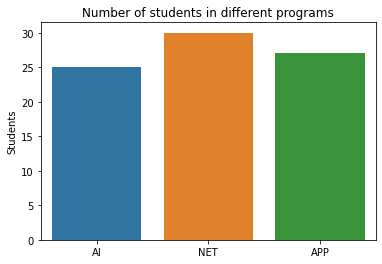

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot students, that contain numbers:
# Chose data to load,
# chose which part should be on the x-axis, 
# chose which column should be on the y axis
sns.barplot(data = large_groups, x = large_groups.index, y="Students")
plt.title("Number of students in different programs") # Compatible with matplotlib!
# though we can use seaborn for such settings also.
